# Knot depth analysis

## 1. Loading and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

In [5]:
filename = f'../data/signature_x1_L15_W3_20250324_190419.csv'

# Load the DataFrame from the CSV file
sig_df = pd.read_csv(filename)

# Load depth information
depth_df = pd.read_csv('../data/external/trefoil_list.csv')

# Merge dataframes
df = pd.merge(sig_df, depth_df, on='Chain')
print(df.head(1))

    Chain  Landscape     [111]         [112]         [113]         [114]  \
0  1by7_A          1 -0.000007 -2.725250e-07 -1.292632e-07 -2.048901e-08   

          [115]         [116]         [117]         [118]  ...  \
0  8.331080e-09  1.372428e-08  2.393014e-08  2.625655e-08  ...   

   [(15)][(15)][(11)]  [(15)][(15)][(12)]  [(15)][(15)][(13)]  \
0            0.109337              0.0952            0.050675   

   [(15)][(15)][(14)]  [(15)][(15)][(15)]     Depth  Length  N-tail  C-tail  \
0             0.01737        1.093080e-08  0.037586     381     176      31   

   Representative  
0           Other  

[1 rows x 8022 columns]


## 2. Depth analysis
We label proteins by their knot depth into 3 categories:
deep, 
shallow, 
neither.

In [6]:
# Classify depths
df['depth_class'] = pd.cut(df['Depth'],
                          bins=[-np.inf, 0.005, 0.05, np.inf],
                          labels=['shallow', 'neither', 'deep'])

In [7]:
# Select signature and depth data from dataframe
X = df.drop(columns=['Landscape', 'Chain', 'Depth', 'Length', 'N-tail', 'C-tail', 'Representative', 'depth_class'])
depths = df['Depth'].values

### 2.1. ISOMAP using depth classification

In [9]:
# Set hyperparameter

# n_neighbor_parameter = min(20, len(df) // 10)  # e.g., 5-20 for typical datasets
n_neighbor_parameter = 30

# Isomap projection
iso = Isomap(n_components=2, n_neighbors = n_neighbor_parameter)
X_iso = iso.fit_transform(X)

Graph using labeling and color scheme from proteins paper

In [10]:
# Custom color scheme
color_map = {
    'deep': '#A7F432',    # lime green
    'shallow': '#FFB6C1', # pastel pink
    'neither': '#D3D3D3'  # light grey
}

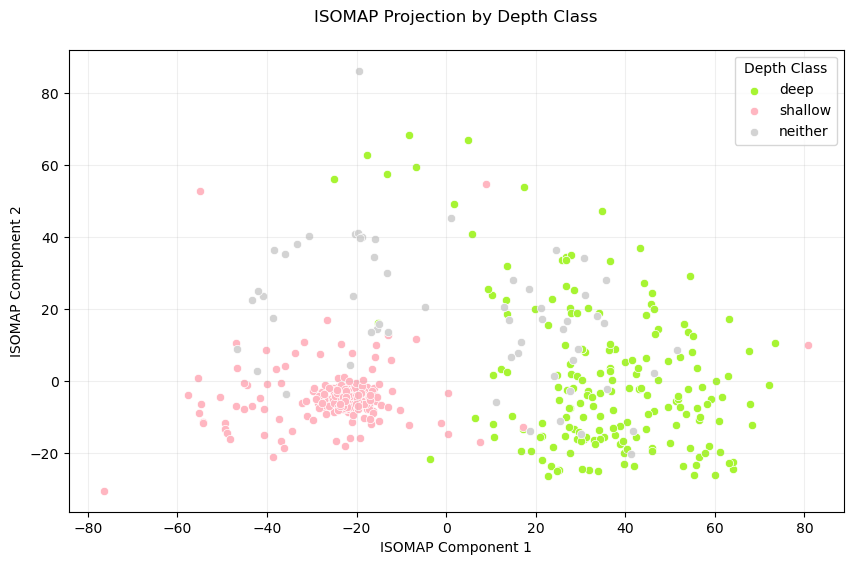

In [11]:
# Plot by depth class
# Create and save categorical plot
plt.figure(figsize=(10, 6))
for cls, color in color_map.items():
    mask = df['depth_class'] == cls
    plt.scatter(X_iso[mask, 0], X_iso[mask, 1], 
                c=color, label=cls, alpha=1, 
                edgecolor='w', linewidth=0.5)
    
plt.legend(title='Depth Class', frameon=True)
plt.title('ISOMAP Projection by Depth Class', pad=20)
plt.xlabel('ISOMAP Component 1')
plt.ylabel('ISOMAP Component 2')
plt.grid(True, alpha=0.2)

# Save with tight layout
# plt.savefig('../results/fig/isomap_depth_classes_neighbors30.png', 
            # dpi=300, 
            # bbox_inches='tight',
            # facecolor='white')  # ensures white background
# plt.close()

We include a plot showing the same ISOMAP colored by depth classification (bottom), and representative (top). The axes have been swapped for easier comparison with the proteins paper.

In [18]:
# 1. Run ISOMAP
iso = Isomap(n_components=2, n_neighbors=30)
X_iso = iso.fit_transform(X)

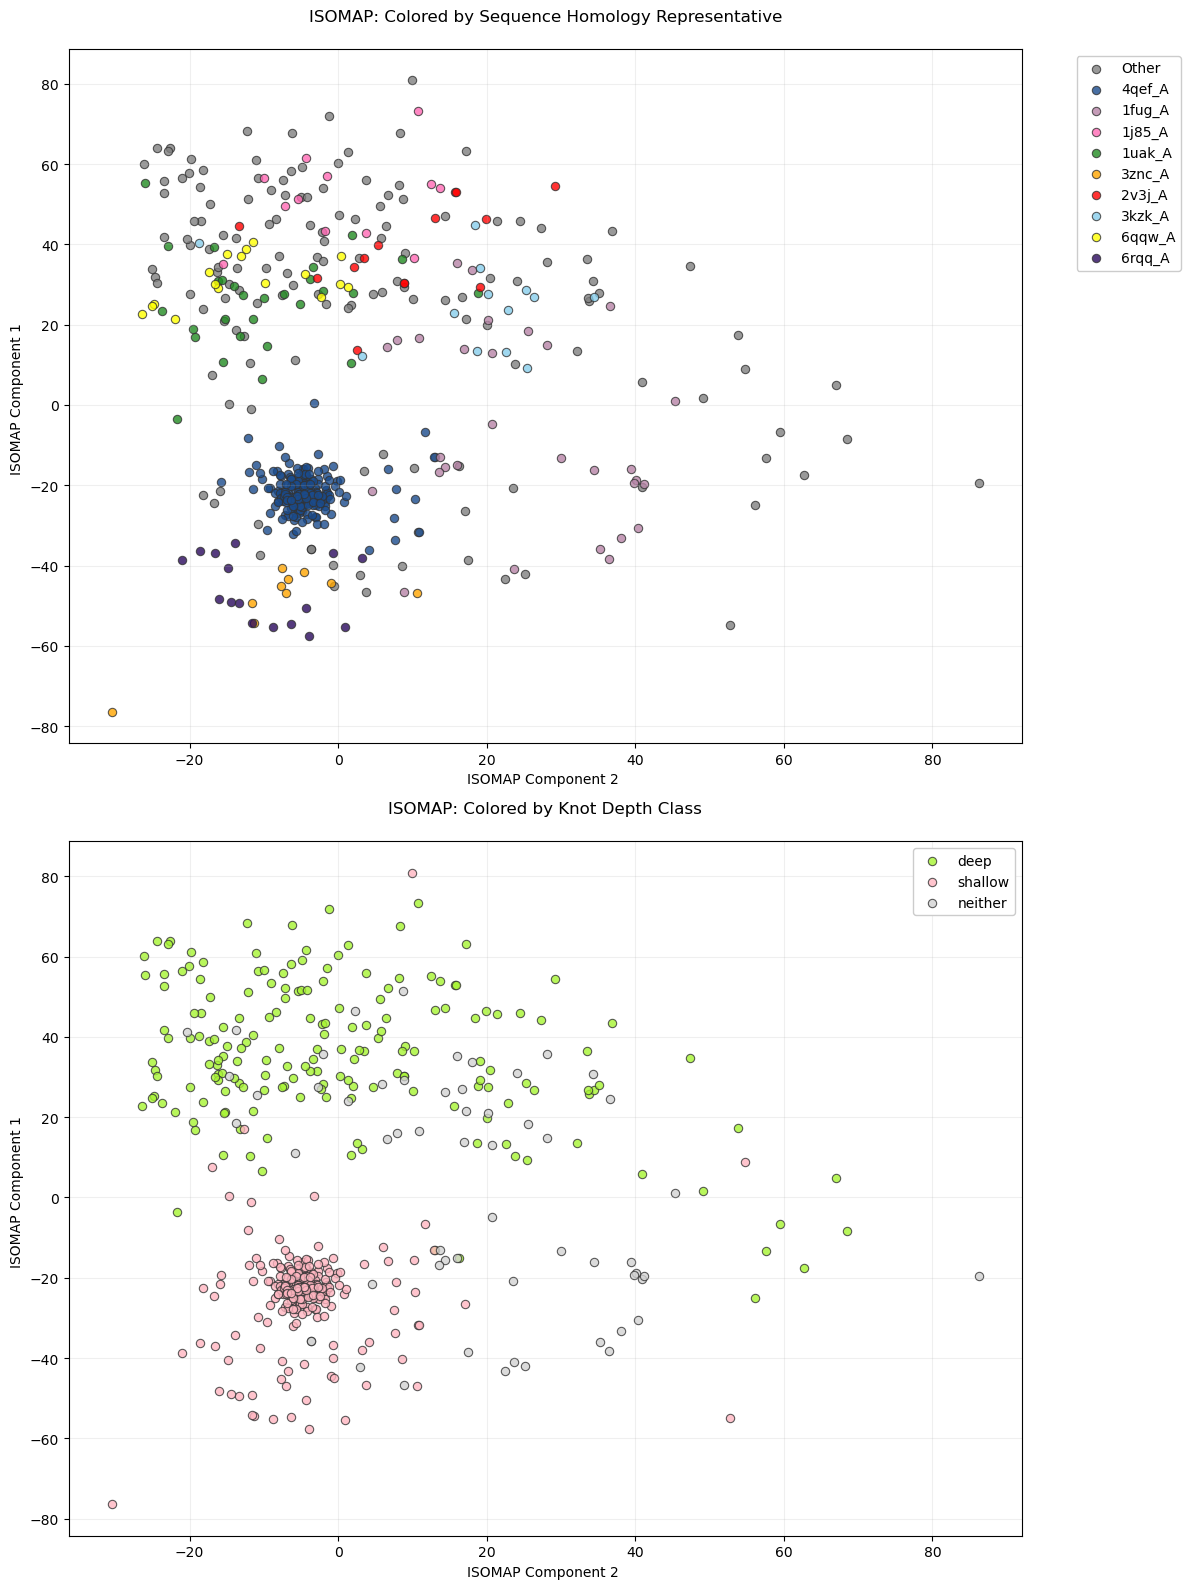

In [20]:

# 2. Custom color mappings
rep_classes = ['Other', '4qef_A', '1fug_A', '1j85_A', '1uak_A', 
               '3znc_A', '2v3j_A', '3kzk_A', '6qqw_A', '6rqq_A']
rep_colors = [
    '#808080',  # grey (Other)
    '#1A4B8C',  # denim blue (4qef_A)
    '#B784A7',  # mauve (1fug_A)
    '#FF69B4',  # BRIGHT PINK (1j85_A)
    '#228B22',  # green (1uak_A)
    '#FFA500',  # orange (3znc_A)
    '#FF0000',  # red (2v3j_A)
    '#87CEEB',  # sky blue (3kzk_A)
    '#FFFF00',  # yellow (6qqw_A)
    '#2A0A5E'   # dark blue-violet (6rqq_A)
]
rep_color_dict = dict(zip(rep_classes, rep_colors))
depth_color_dict = color_map

# 3. Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), dpi=100)

# Top panel - Representatives (with swapped axes)
for rep, color in rep_color_dict.items():
    mask = df['Representative'] == rep
    ax1.scatter(X_iso[mask, 1], X_iso[mask, 0],  # Axes already swapped
                c=[color], label=rep, alpha=0.8,
                edgecolor='#333333', 
                linewidth=0.8)
ax1.set_title('ISOMAP: Colored by Sequence Homology Representative', pad=20)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)
ax1.grid(alpha=0.2)
ax1.set_xlabel('ISOMAP Component 2 ')  # Labels reflect swap
ax1.set_ylabel('ISOMAP Component 1 ')

# Bottom panel - Depth Classes (with swapped axes)
for cls, color in depth_color_dict.items():
    mask = df['depth_class'] == cls
    ax2.scatter(X_iso[mask, 1], X_iso[mask, 0],  # Axes already swapped
                c=color, label=cls, alpha=0.8,
                edgecolor='#333333',
                linewidth=0.8)
ax2.set_title('ISOMAP: Colored by Knot Depth Class', pad=20)
ax2.legend(framealpha=1)
ax2.grid(alpha=0.2)
ax2.set_xlabel('ISOMAP Component 2 ')  # Labels reflect swap
ax2.set_ylabel('ISOMAP Component 1 ')

plt.tight_layout()
# plt.savefig('fig/isomap_dual_panel_swapped.png', dpi=300, bbox_inches='tight', facecolor='white')
# plt.close()

### 2.2. ISOMAP using depth values

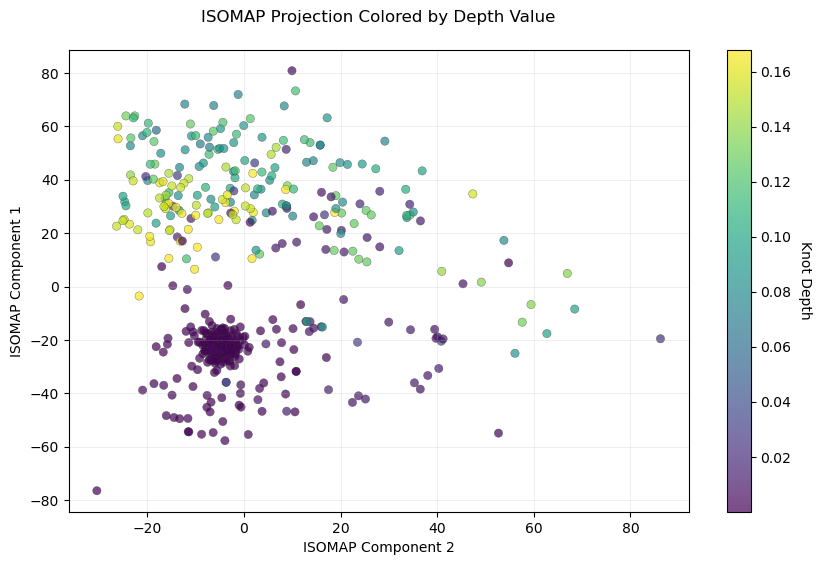

In [21]:
# Create and save continuous version
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_iso[:, 1], X_iso[:, 0], 
                c=df['Depth'], cmap='viridis', 
                alpha=0.7, edgecolor='#333333',
                linewidth=0.3)
cbar = plt.colorbar(sc)
cbar.set_label('Knot Depth', rotation=270, labelpad=15)
plt.title('ISOMAP Projection Colored by Depth Value', pad=20)
plt.xlabel('ISOMAP Component 2')
plt.ylabel('ISOMAP Component 1')
plt.grid(True, alpha=0.2)

# plt.savefig('../results/fig/isomap_depth_continuous_neighbors30.png', 
#             dpi=300, 
#             bbox_inches='tight',
#             facecolor='white')
# plt.close()

## 3. Quatifying the relationship between signatures and depth

### 3.1. Spearman correlation score

In [25]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

# Compute pairwise signature distances
sig_dists = squareform(pdist(X, 'euclidean'))

# Compute pairwise depth differences
depth_diffs = squareform(pdist(df[['Depth']], 'euclidean'))

# Flatten and correlate
corr, pval = spearmanr(sig_dists.ravel(), depth_diffs.ravel())
print(f"Depth-signature distance correlation: {corr:.3f} (p={pval:.10e})")

Depth-signature distance correlation: 0.647 (p=0.0000000000e+00)


In [26]:
pval

np.float64(0.0)

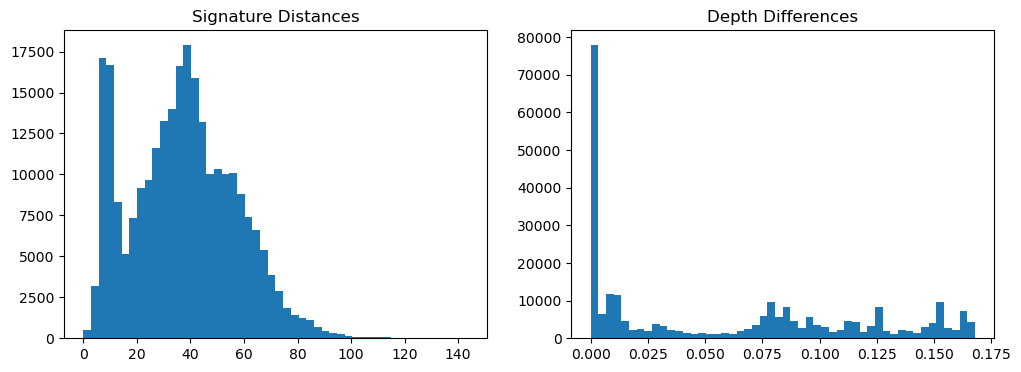

In [27]:
# debugging
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(sig_dists.ravel(), bins=50)
plt.title("Signature Distances")

plt.subplot(122)
plt.hist(depth_diffs.ravel(), bins=50)
plt.title("Depth Differences")
plt.show()

In [28]:
# debugging
print(f"Unique signature distances: {len(np.unique(sig_dists))}")
print(f"Unique depth differences: {len(np.unique(depth_diffs))}")

Unique signature distances: 130817
Unique depth differences: 42041


In [29]:
# debugging
# Check top/bottom deciles
q_low = np.quantile(sig_dists, 0.1)
q_high = np.quantile(sig_dists, 0.9)
print(f"Mean depth diff (low sig dist): {depth_diffs[sig_dists <= q_low].mean():.3f}")
print(f"Mean depth diff (high sig dist): {depth_diffs[sig_dists >= q_high].mean():.3f}")

Mean depth diff (low sig dist): 0.000
Mean depth diff (high sig dist): 0.091


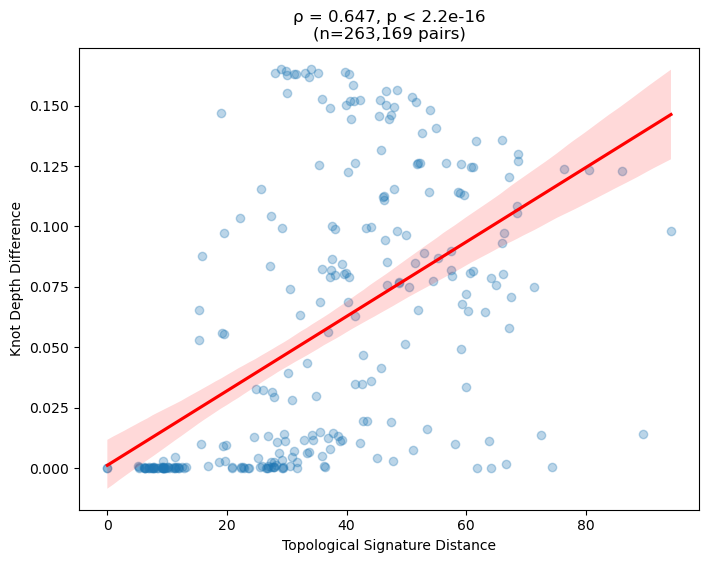

In [30]:
# debugging
import seaborn as sns

# Hexbin plot for high-density data
plt.figure(figsize=(8,6))
sns.regplot(x=sig_dists.ravel()[::1000],  # Subsample for plotting
            y=depth_diffs.ravel()[::1000], 
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
plt.xlabel("Topological Signature Distance")
plt.ylabel("Knot Depth Difference")
plt.title(f"ρ = {corr:.3f}, p < 2.2e-16\n(n={len(sig_dists.ravel()):,} pairs)")
plt.show()

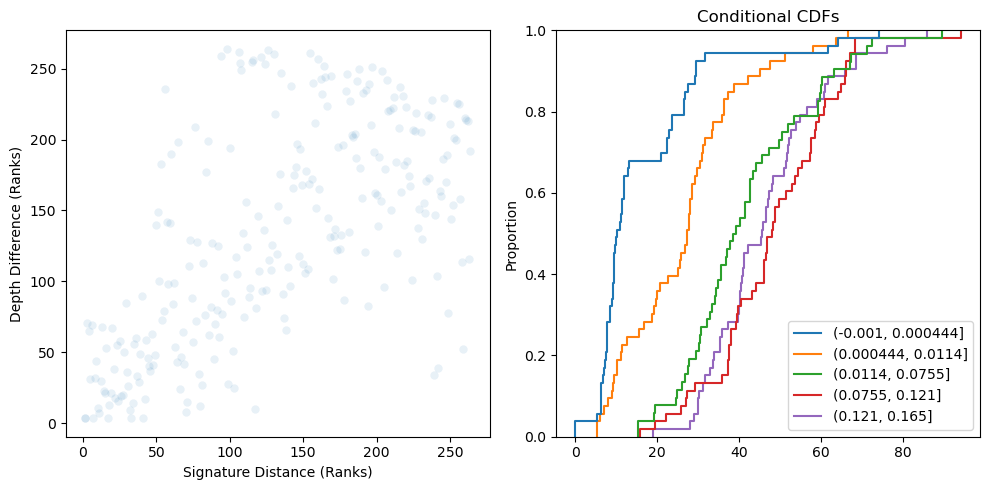

In [32]:
# debugging
from scipy.stats import rankdata
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(
    x=rankdata(sig_dists.ravel()[::1000]),
    y=rankdata(depth_diffs.ravel()[::1000]),
    alpha=0.1
)
plt.xlabel("Signature Distance (Ranks)")
plt.ylabel("Depth Difference (Ranks)")

plt.subplot(122)
sns.ecdfplot(x=sig_dists.ravel()[::1000], hue=pd.qcut(depth_diffs.ravel()[::1000], 5))
plt.title("Conditional CDFs")
plt.tight_layout()

/tmp/ipykernel_78541/3876109855.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Signature Distance")


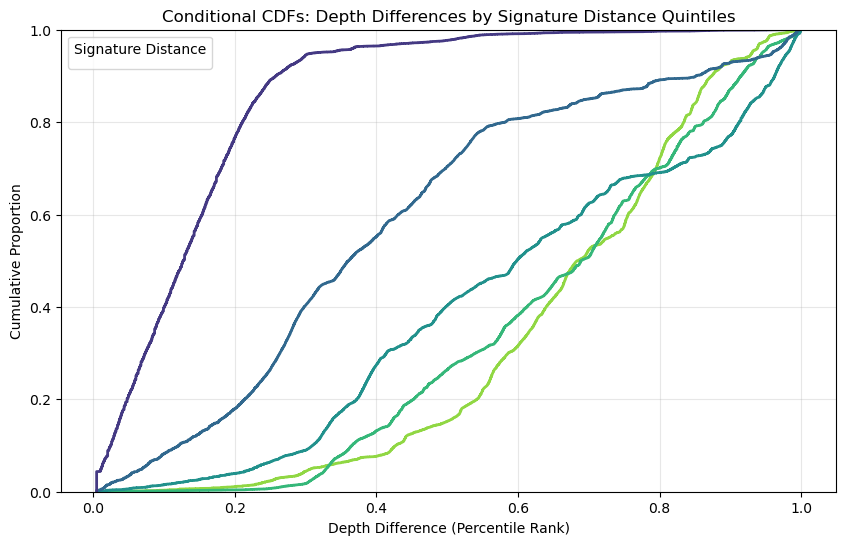

In [33]:
# debugging
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata

# Prepare data
sig_ranks = rankdata(sig_dists.ravel()) / len(sig_dists.ravel())  # Convert to percentiles
depth_ranks = rankdata(depth_diffs.ravel()) / len(depth_diffs.ravel())

# Create quintile groups
groups = pd.qcut(sig_ranks, q=5, labels=[
    "Bottom 20%", "20-40%", "40-60%", "60-80%", "Top 20%"
])

# Plot
plt.figure(figsize=(10,6))
sns.ecdfplot(x=depth_ranks, hue=groups, palette="viridis", linewidth=2)
plt.xlabel("Depth Difference (Percentile Rank)")
plt.ylabel("Cumulative Proportion")
plt.title("Conditional CDFs: Depth Differences by Signature Distance Quintiles")
plt.legend(title="Signature Distance")
plt.grid(True, alpha=0.3)
plt.show()

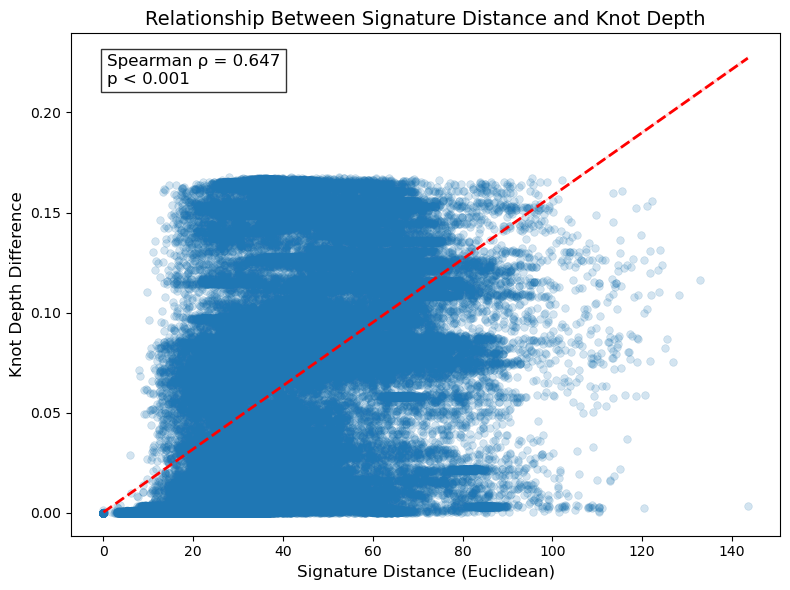

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Flatten the distance matrices
sig_dists_flat = sig_dists.ravel()
depth_diffs_flat = depth_diffs.ravel()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=sig_dists_flat,
    y=depth_diffs_flat,
    alpha=0.1,  # Makes points slightly transparent to handle overlap
    edgecolor=None,  # Removes dark edges for cleaner look
    s=30,  # Adjusts point size
)

# Add regression line to show trend
sns.regplot(
    x=sig_dists_flat,
    y=depth_diffs_flat,
    scatter=False,  # Avoids overplotting points
    color='red',
    line_kws={'linewidth': 2, 'linestyle': '--'},
)

# Annotate the Spearman correlation
plt.text(
    0.05, 0.9,
    f"Spearman ρ = {corr:.3f}\np < 0.001",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8),
)

# Labels and title
plt.xlabel("Signature Distance (Euclidean)", fontsize=12)
plt.ylabel("Knot Depth Difference", fontsize=12)
plt.title("Relationship Between Signature Distance and Knot Depth", fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()

The above analysis suggests that there is a significant correlation but it is not linear and further analysis is required to describe it precisely.

### 3.2. Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
scores = cross_val_score(rf, X, df['Depth'], cv=5, scoring='r2')
print(f"R² score for depth prediction: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

R² score for depth prediction: 0.866 ± 0.048


High Predictive Power (R² = 0.866)

The model explains 86.6% of the variance in knot depth using your discrete signature (X).

Values close to 1 indicate strong predictive performance.

Low Variability (± 0.048)

The small standard deviation (± 0.048) across folds suggests consistent performance (no major overfitting or data splits bias).

Comparison to Baseline

If we had a trivial model (e.g., always predicting the mean depth), R² would be 0. Our model significantly outperforms this.

### 3.3. What terms of the signature have highest correlation with depth?

In [142]:
from sklearn.feature_selection import mutual_info_regression

# Non-linear correlation
mi_scores = mutual_info_regression(X, df['Depth'])
top_features = X.columns[np.argsort(mi_scores)[-10:]]  # Top 10 correlated features

In [144]:
top_features

Index(['[(12)(12)][(14)]', '[(11)(11)][(14)]', '[88][(14)]',
       '[(10)(10)][(14)]', '[66][(14)]', '[99][(14)]', '[77][(14)]',
       '[11][(14)]', '[(15)(15)][(14)]', '[(14)][(15)(15)]'],
      dtype='object')

Further analysis is needed for meaningful conclusions.